<a href="https://colab.research.google.com/github/EA-Digifolk/EA-Digifolk-Dataset/blob/main/EADigifolk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EA-Digifolk Explorer



Links:

* [EA-Digifolk dataset](https://github.com/EA-Digifolk/EA-Digifolk-Dataset.git)
* [Extract Features from MEI Parser](https://github.com/EA-Digifolk/MEIParser_features)
* [Presentation](https://)

## Setup

This section covers downloading the the [EA-Digifolk dataset](https://github.com/EA-Digifolk/EA-Digifolk-Dataset.git) and the [Parser](https://github.com/EA-Digifolk/MEIParser_features) to extract features from MEI files, and installing the required libraries for the parser to function, and the [Musescore](https://musescore.org) software for displaying the musical scores.

In [143]:
%%capture
#@title Download the EA-Digifolk Dataset from Github
%cd /content

import os
if os.path.exists('EA-Digifolk-Dataset'):
  !git -C EA-Digifolk-Dataset pull
else:
  !git clone https://github.com/EA-Digifolk/EA-Digifolk-Dataset.git

In [20]:
%%capture
%cd /content
#@title Download the MEI Parser

import os
if os.path.exists('MEIParser_features'):
  !git -C MEIParser_features pull
else:
  !git clone https://github.com/EA-Digifolk/MEIParser_features


!pip install -r MEIParser_features/requirements.txt -q

import sys
if not '/content/MEIParser_features' in sys.path:
  sys.path.append('/content/MEIParser_features')

In [21]:
%%capture
#@title Install Musescore
!apt-get update -q && apt-get install musescore lilypond -q
%env QT_QPA_PLATFORM=offscreen

In [22]:
#@title Install Music21 and setup Musescore in the Music21 Environment
!pip install music21 -q

import music21
env = music21.environment.Environment()
env['pdfPath'] = '/usr/bin/musescore'
env['graphicsPath'] = '/usr/bin/musescore'
env['musicxmlPath'] = '/usr/bin/musescore'
env['musescoreDirectPNGPath'] = '/usr/bin/musescore'
env['autoDownload'] = 'allow'
env['warnings'] = 0

## Extract features from MEI files

This section covers the processing of the dataset: extracting the features from the MEI files and save as a pandas dataframe for easy exploration.

This section is optional, as the saved pandas dataframe is provided in the EA-Digifolk dataset folder by default.

In [ ]:
%%script false --no-raise-error
# comment above line if you want to process the dataset

# @title Process Dataset

# Import Libs from Python
import importlib
import glob
from fractions import Fraction
from tqdm import tqdm

# Import External Libs
import music21 as m21
import pandas as pd

# Import Parser
import parser_mei_features
from parser_mei_features import MeiParser

songs = reversed(sorted(list(glob.glob('EA-Digifolk-Dataset/Spanish/*.mei') + glob.glob('EA-Digifolk-Dataset/Mexican/*.mei'))))
songs = [so for so in songs if so not in [f'EA-Digifolk-Dataset/Spanish/{s}' for s in ['ES-1948-AS-FP-006.mei', 'ES-1948-CB-CO-376.mei', 'ES-1948-CB-CO-418.mei', 'ES-1991-CL-KS-147.mei']] ]

songs = list(reversed(songs))

errors = []
EADIGIFOLKNT = pd.DataFrame()

for song in tqdm(songs):

    try:
      mei_parser = MeiParser()
      song_features = mei_parser.parse_mei(song, verbose=False)
      EADIGIFOLKNT = pd.concat([EADIGIFOLKNT, pd.DataFrame().from_dict(song_features)], axis=1)
    except Exception as e:
      errors.append((song, e))

print('\n Files with errors:')
for err in errors:
  print(err)

# Transpose Dataframe so songs' IDs are now the index and create country column from ID
EADIGIFOLK = EADIGIFOLKNT.T
EADIGIFOLK.set_index('id', inplace=True)
EADIGIFOLK['country'] = EADIGIFOLK.index.to_series().apply(lambda x: x.split('-')[0])

# Save Dataframe to compressed file to save
EADIGIFOLK.to_pickle('EADIGIFOLKT.gzip', compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})

## Exploring the EA-Digifolk Dataset

This section covers possible ways of exploring the dataset.

In [145]:
#@title Import saved pandas dataframe

import pandas as pd
EADIGIFOLK = pd.read_pickle("/content/EA-Digifolk-Dataset/EADIGIFOLK.gzip", compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})

In [ ]:
#@title List all songs in the dataset

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

EADIGIFOLK

Showing: EA-Digifolk-Dataset/Spanish/ES-1948-CB-CO-297.mei

Score: 



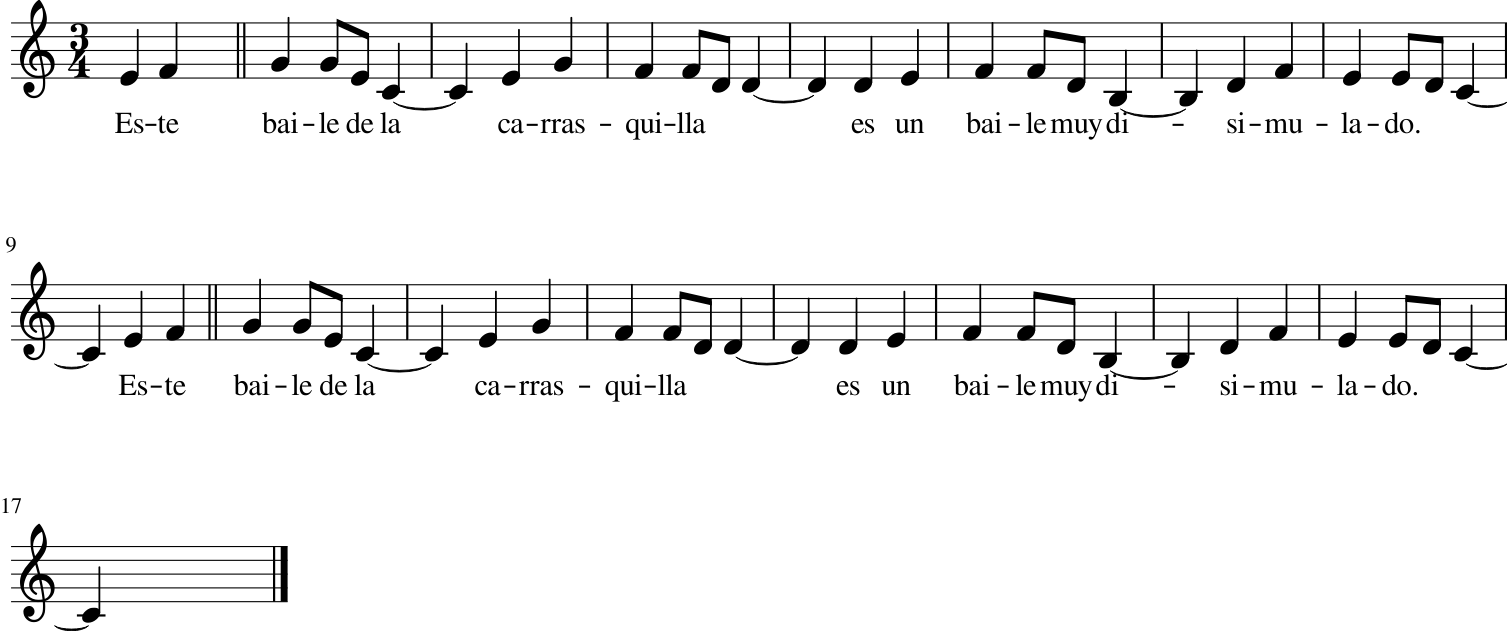


Metadata Features: 



,ES-1948-CB-CO-297
country,ES
title,\n Este Baila De La Carrasq...
compiler,\n Córdova y Oña\n ...
encoder,\n Sara González\n ...
source_id,to_add
source_title,\n Cancione...
source_subtitle,\n Cancione...
source_compiler,\n Sixt...
publisher,\n Excma. D...
publication_place,\n Santande...



Note Features: 



,id,scaledegree,scaledegreespecifier,tonic,mode,pitch,midipitch,pitch40,diatonicpitch,chromaticinterval,diatonicinterval,pitchproximity,pitchreversal,contour3,contour5,offsets,duration,duration_frac,duration_fullname,nextisrest,restduration_frac,onsettick,durationcontour,songpos,ima,ima_contour,timesignature,beat,beat_str,beat_fraction_str,beatstrength,metriccontour,posinbar,phrasepos,phrase_ix,phrase_end,beatinsong,beatinphrase,beatfractioninphrase,beatinphrase_end,ioi_frac,ioi,ior_frac,ior,gpr2a_Frankland,gpr2b_Frankland,gpr3a_Frankland,gpr3d_Frankland,gpr_Frankland_sum,lbdm_rpitch,lbdm_spitch,lbdm_rioi,lbdm_sioi,lbdm_rrest,lbdm_srest,lbdm_boundarystrength,lyrics
0,n1r35d89,3,M,C,Major,E4,64,135,31,NaN,NaN,NaN,NaN,None,None,1.0,1.0,1,Quarter,False,None,2,None,0.020833,1.000000,None,3/4,1.0,1,0,0.50,None,0.000000,0.000000,0,False,0,0,1,-11,1,1.0,None,NaN,None,None,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(1, Es, begin)]"
1,no3hdhg,4,P,C,Major,F4,65,140,32,1.0,1.0,NaN,NaN,+,+,2.0,1.0,1,Quarter,False,None,4,=,0.041667,1.000000,=,3/4,2.0,2,0,0.50,=,0.333333,0.090909,0,False,1,1,1,-10,1,1.0,1,1.0,None,None,0.750,NaN,0.750,0.200000,0.319565,0.000000,0.0,0.0,0.0,0.079891,"[(1, te, end)]"
2,nn2wfne,5,P,C,Major,G4,67,146,33,2.0,1.0,2.0,0.0,+,+,3.0,1.0,1,Quarter,False,None,6,=,0.062500,1.000000,=,3/4,1.0,1,0,1.00,+,0.000000,0.181818,0,False,2,2,1,-9,1,1.0,1,1.0,None,None,NaN,1.5,1.500,0.500000,0.000000,0.000000,1.0,0.0,0.0,0.500000,"[(1, bai, begin)]"
3,ns1tt3q,5,P,C,Major,G4,67,146,33,0.0,0.0,0.0,0.0,=,=,4.0,0.5,1/2,Eighth,False,None,8,-,0.083333,1.000000,=,3/4,2.0,2,0,0.50,-,0.333333,0.272727,0,False,3,3,1/2,-8,1/2,0.5,1/2,0.5,None,None,NaN,NaN,0.000,0.600000,0.486957,0.333333,0.5,0.0,0.0,0.371739,"[(1, le, end)]"
4,n1vmlmj5,3,M,C,Major,E4,64,135,31,-3.0,-2.0,3.0,0.0,-,--,4.5,0.5,1/2,Eighth,False,None,9,=,0.093750,0.029213,-,3/4,2.5,2,1/2,0.25,-,0.500000,0.318182,0,False,7/2,7/2,1/2,-15/2,1/2,0.5,1,1.0,None,None,0.625,1.5,2.125,0.111111,0.710145,0.000000,0.5,0.0,0.0,0.427536,"[(1, de, single)]"
5,nliwb3v,1,P,C,Major,C4,60,123,29,-4.0,-2.0,4.0,0.0,-,--,5.0,1.0,1,Quarter,False,None,10,+,0.104167,1.000000,+,3/4,3.0,3,0,0.50,+,0.666667,0.363636,0,False,4,4,1,-7,1,1.0,2,2.0,None,None,NaN,NaN,0.000,0.666667,0.000000,0.333333,1.0,0.0,0.0,0.500000,"[(1, la, single)]"
6,nqjc73o,1,P,C,Major,C4,60,123,29,0.0,0.0,0.0,0.0,=,=,6.0,1.0,1,Quarter,False,None,12,=,0.125000,1.000000,=,3/4,1.0,1,0,1.00,+,0.000000,0.454545,0,False,5,5,1,-6,1,1.0,1,1.0,None,None,0.625,1.0,1.625,0.666667,0.710145,0.000000,0.0,0.0,0.0,0.177536,[]
7,n16xdhis,3,M,C,Major,E4,64,135,31,4.0,2.0,4.0,0.0,+,++,7.0,1.0,1,Quarter,False,None,14,=,0.145833,1.000000,=,3/4,2.0,2,0,0.50,-,0.333333,0.545455,0,False,6,6,1,-5,1,1.0,1,1.0,None,None,NaN,1.0,1.000,0.111111,0.173913,0.000000,0.0,0.0,0.0,0.043478,"[(1, ca, begin)]"
8,n1ezujhb,5,P,C,Major,G4,67,146,33,3.0,2.0,3.0,0.0,+,++,8.0,1.0,1,Quarter,False,None,16,=,0.166667,1.000000,=,3/4,3.0,3,0,0.50,=,0.666667,0.636364,0,False,7,7,1,-4,1,1.0,1,1.0,None,None,NaN,NaN,0.000,0.142857,0.293478,0.000000,0.0,0.0,0.0,0.073370,"[(1, rras, middle)]"
9,ni3m7oa,4,P,C,Major,F4,65,140,32,-2.0,-1.0,2.0,1.5,-,-,9.0,1.0,1,Quarter,False,None,18,=,0.187500,1.000000,=,3/4,1.0,1,0,1.00,+,0.000000,0.727273,0,False,8,8,1,-3,1,1.0,1,1.0,None,None,NaN,1.5,1.500,0.500000,0.000000,0.000000,1.0,0.0,0.0,0.500000,"[(1, qui, middle)]"


In [152]:
#@title View Song

#@markdown

ID = "ES-1948-CB-CO-297" # @param {"type":"string","placeholder":"MX-1951-00-VM-00001"}

song_path = f"EA-Digifolk-Dataset/{'Mexican' if 'MX' in ID else 'Spanish'}/{ID}.mei"
print('Showing: ' + song_path + '\n')

mei_parser = MeiParser()
song_features = mei_parser.parse_mei(song_path, verbose=False)

print('Score: \n')
mei_parser.mtc_extractor.music_stream.show()

print('\nMetadata Features: \n')
metadata = EADIGIFOLK.loc[ID]
metadata = metadata.replace('NaN', None).reindex(['id', 'country', 'title'] + metadata.index.to_list()[2:-2]).dropna()
display(metadata)

print('\nNote Features: \n')
features = pd.DataFrame(EADIGIFOLK.loc[ID, 'features'])
display(features)

,range
count,767
unique,24
top,P8
freq,156


,count
range,
P8,156
M6,107
P1,99
m7,95
P5,72
m6,61
M9,44
P4,32
M7,28


<Axes: xlabel='range'>

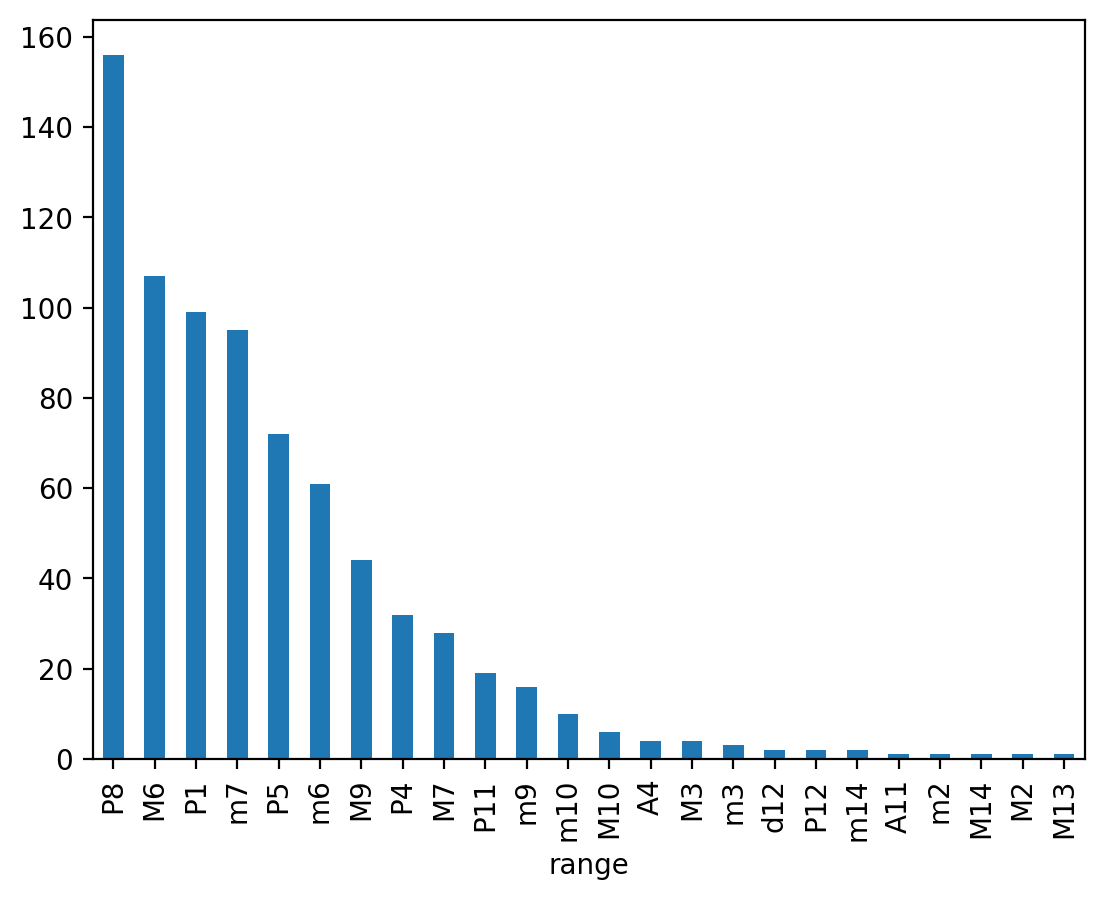

In [154]:
# @title Show Distributions of Feature In Dataset {"run":"auto","vertical-output":true,"display-mode":"form"}

#@markdown This code block generates descriptive statistics and distributions for various musical and metadata features in the EA-Digifolk dataset.
#@markdown >The user can select both a subset of the dataset and a feature whose distribution will be analyzed.

dataset = "spanish" # @param ["all", "mexican", "spanish"]
feature = "range" # @param ["range", "number of phrases", "number of notes per phrase", "key", "mode", "key-mode", "meter", "country", "textual topics"]

temp_dataset = EADIGIFOLK.copy()
if dataset == 'spanish':
  temp_dataset = temp_dataset[temp_dataset['country'] == 'ES']
elif dataset == 'mexican':
  temp_dataset = temp_dataset[temp_dataset['country'] == 'MX']

if feature == 'range':
  temp_df = temp_dataset[['ambitus_highest', 'ambitus_lowest']].copy()
  temp_df['m21_H'] = temp_df['ambitus_highest'].apply(lambda x: m21.pitch.Pitch(x.replace(' flat','-')) if x is not None else None)
  temp_df['m21_L'] = temp_df['ambitus_lowest'].apply(lambda x: m21.pitch.Pitch(x.replace(' flat','-')) if x is not None else None)
  temp_df['range'] = temp_df.apply(lambda x: m21.interval.Interval(x['m21_H'], x['m21_L']).name, axis=1)
  display(temp_df['range'].describe())
  display(temp_df['range'].value_counts())
  display(temp_df['range'].value_counts().plot(kind='bar'))
elif feature == 'number of phrases':
  print(temp_dataset['phrases'])
  # @TODO
elif feature == 'number of notes per phrase':
  print(temp_dataset['phrases'])
  # @TODO
elif feature == 'key-mode':
  temp_df = temp_dataset[['key', 'mode']].copy()
  temp_df['key-mode'] = temp_df[['key','mode']].apply(lambda x: x['key'].capitalize().replace(' ','') + ' ' + x['mode'].capitalize().replace(' ',''), axis=1)
  display(temp_df['key-mode'].describe())
  display(temp_df['key-mode'].value_counts())
  display(temp_df['key-mode'].value_counts().plot(kind='bar'))
elif feature == 'textual topics':
  display(temp_dataset['textual_topics'].explode().str.capitalize().describe())
  display(temp_dataset['textual_topics'].explode().str.capitalize().value_counts())
  display(temp_dataset['textual_topics'].explode().str.capitalize().value_counts().plot(kind='bar'))
elif feature in ['key', 'mode', 'meter', 'country']:
  display(temp_dataset[feature].str.capitalize().describe())
  display(temp_dataset[feature].str.capitalize().value_counts())
  display(temp_dataset[feature].str.capitalize().value_counts().plot(kind='bar'))

In [179]:
# @title Search Dataset per Feature

dataset = "all" # @param ["all", "mexican", "spanish"]
feature = "country" # @param ["range", "number of phrases", "number of notes per phrase", "key", "mode", "key-mode", "meter", "country", "textual topics"]
value = "ES" # @param {"type":"string","placeholder":"Lullaby"}

temp_dataset = EADIGIFOLK.copy()
if dataset == 'spanish':
  temp_dataset = temp_dataset[temp_dataset['country'] == 'ES']
elif dataset == 'mexican':
  temp_dataset = temp_dataset[temp_dataset['country'] == 'MX']

mask = None

if feature == 'range':
  temp_df = temp_dataset[['ambitus_highest', 'ambitus_lowest']].copy()
  temp_df['m21_H'] = temp_df['ambitus_highest'].apply(lambda x: m21.pitch.Pitch(x.replace(' flat','-')) if x is not None else None)
  temp_df['m21_L'] = temp_df['ambitus_lowest'].apply(lambda x: m21.pitch.Pitch(x.replace(' flat','-')) if x is not None else None)
  temp_df['range'] = temp_df.apply(lambda x: m21.interval.Interval(x['m21_H'], x['m21_L']).name, axis=1)
  mask = EADIGIFOLK.index.isin(temp_df[temp_df['range'].str.contains(value) == True].index.to_list())
elif feature == 'number of phrases':
  pass
  # @TODO
elif feature == 'number of notes per phrase':
  pass
  # @TODO
elif feature == 'key-mode':
  temp_df = temp_dataset[['key', 'mode']].copy()
  temp_df['key-mode'] = temp_df[['key','mode']].apply(lambda x: x['key'].capitalize().replace(' ','') + ' ' + x['mode'].capitalize().replace(' ',''), axis=1)
  mask = EADIGIFOLK.index.isin(temp_df[temp_df['key-mode'].str.contains(value) == True].index.to_list())
elif feature == 'textual topics':
  topics = [value] if ';' not in value else value.split('; ')
  mask = EADIGIFOLK.index.isin(temp_dataset.textual_topics.apply(lambda x: any(item for item in topics if item in x)).index.to_list())
elif feature in ['key', 'mode', 'meter', 'country']:
  mask = EADIGIFOLK.index.isin(temp_dataset[temp_dataset[feature].str.contains(value) == True].index.to_list())

display(EADIGIFOLK[mask])
print(f"Number of Rows: {EADIGIFOLK[mask].shape[0]}")

,title,subtitle,compiler,informer,geographic,encoder,editor,source_id,source_title,source_subtitle,source_compiler,source_informer,bibliography,introduction,edition,publisher,publication_place,date,pages,ambitus_lowest,ambitus_highest,pitch_pattern,interval_pattern,rhythm_pattern,phrases,key,mode,meter,tempo,genre,ngram,bigram,textual_topics,has_lyrics?,has_freemeter?,features,country
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ES-1913-B-JSV-001,El Señor Gato,Estava El Señor Gato,Serra I Vilaró,None,None,Sara G.,None,to_add,El Cançoner Del Calic,Recollit I Ordenat Per Mn. Serra I Vilaró,Joan Serra I Vilaró,None,None,None,None,Butlletí Del Centre Excursionista De Catalunya...,Barcelona,1913,138,f4,c5,"{'total': '37', 'unit': 'count', 'normalized':...","{'histogram': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","{'optimal_resolution': '16th', 'histogram': [2...","(1, #n15pex1v, #nb5y2fm, A); (3, #n9j2iv2, #nb...",F,Ionian,Binary,Andante,Children song,gato,señor gato,"[Animals, Symbolic & Traditional, Honorific]",Vocal,False,"{'id': ['n15pex1v', 'n1aez3aj', 'n1dni8v2', 'n...",ES
ES-1913-B-JSV-002,\n Els Gats De Codina\n ...,\n Canço Vui Cantar\n ...,\n Serra I Vilaró\n ...,None,None,\n Sara G.\n ...,None,to_add,\n El Canço...,\n Recollit...,\n Joan...,None,None,None,None,\n Butlletí...,\n Barcelon...,1913,138,d4,c5,"{'total': '44', 'unit': 'count', 'normalized':...","{'histogram': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","{'optimal_resolution': '8th', 'histogram': [11...","(1, #n1subg1e, #n10dgkrx, A); (3, #ngdwdsg, #n...",C,major,Binary,\n Vivo\n,\n Children song\n ...,vui,vui cantar,[],Vocal,False,"{'id': ['n1subg1e', 'nsimr5l', 'n1y9n0k0', 'nu...",ES
ES-1913-B-JSV-003,\n Casament Del Poi I La Pu...,\n El Poi I La Puça Se'n Vo...,\n Serra I Vilaró\n ...,None,None,\n Sara G.\n ...,None,to_add,\n El Canço...,\n Recollit...,\n Joan...,None,None,None,None,\n Butlletí...,\n Barcelon...,1913,138,g3,c5,"{'total': '31', 'unit': 'count', 'normalized':...","{'histogram': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0...","{'optimal_resolution': '8th', 'histogram': [10...","(1, #n14qrg3h, #n1aaeteq, A); (4, #npmkxbz, #n...",C,major,Ternary,\n Vivo\n,\n Children song\n ...,poi,poi volen,[Animals],Vocal,False,"{'id': ['n14qrg3h', 'nz1i5g5', 'nbm261w', 'n1l...",ES
ES-1913-B-JSV-004,\n La Gallineta\n ...,\n Ai! De La Gallineta Jo E...,\n Serra I Vilaró\n ...,None,None,\n Sara G.\n ...,None,to_add,\n El Canço...,\n Recollit...,\n Joan...,None,None,None,None,\n Butlletí...,\n Barcelon...,1913,138,b3,e5,"{'total': '44', 'unit': 'count', 'normalized':...","{'histogram': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","{'optimal_resolution': 'triplet-quarter', 'his...","(1, #nuu69er, #n12oxpms, A); (2, #n1so1dbj, #n...",C,major,Ternary,\n Vivo\n,\n Children song\n ...,gallineta,gallineta menjaría,[],Vocal,False,"{'id': ['nuu69er', 'n8kxvc1', 'npeflnf', 'nves...",ES
ES-1913-B-JSV-005,EL GATET; EL GATET,El gatet se n'ha llevat:,Serra i Vilaró,None,None,Sara G.,None,to_add,El Cançoner Del Calic,Recollit I Ordenat Per Mn. Serra I Vilaró,Joan Serra I Vilaró,None,None,None,None,Butlletí Del Centre Excursionista De Catalunya...,Barcelona,1913,138,b-3,c5,"{'total': '0', 'unit': 'count', 'normalized': ...","{'histogram': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0...","{'optimal_resolution': 'triplet-quarter', 'his...","(1, #nkkqd8k, #n6icq17, A); (2, #nr1jinc, #n1w...",B Flat,Aeolian367,Binary,Andant; Andant,Canción Infantil,gatet,gatet llevat,[],Vocal,False,"{'id': ['nkkqd8k', 'nwc94ww', 'n1pewuj6', 'n19...",ES
ES-1943-SA-ASF-006,\n ¡ro! Niñito De La Cuna Q...,\n ¡ro! Niñito De La Cuna Q...,\n Aníbal Sánchez Frail...,\n Francisca Martín Sán...,None,\n Sara González\n ...,None,to_add,\n Nuevo Ca...,\n Colecció...,\n Aníb...,None,None,\n Pról...,None,\n Imprenta...,\n Salamanc...,1943,265,f4,b5,"{'total': '47', 'unit': 'count', 'normalized':...","{'histogram': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","{'optimal_resolution': 'triplet-8th', 'histogr...","(1, #na7li8, #nwe49hw, A); (2, #n1xvu1am, #n12...",F Sharp,

Number of Rows: 767
